In [7]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/MinMax_Normalized_data.csv")
df

,Unnamed: 0,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,0,2023-06-22,0.439250,0.440768,0.438718,0.442698,1.0,0.631459,0.598872,0.577324,...,0.389387,0.222248,0.177701,0.095456,0.787848,0.929593,0.763716,0.913548,0.993908,0.932788
1,1,2023-06-21,0.440835,0.415663,0.442679,0.422679,1.0,0.550358,0.477415,0.558749,...,0.393037,0.220051,0.179838,0.095568,0.792608,0.939838,0.775376,0.910171,0.992273,0.933470
2,2,2023-06-20,0.415668,0.393884,0.408027,0.398336,1.0,0.581989,0.591239,0.590192,...,0.372602,0.207616,0.177230,0.091876,0.786532,0.941191,0.789789,0.914970,0.985290,0.936769
3,3,2023-06-19,0.393889,0.386342,0.388148,0.392718,1.0,0.550355,0.636725,0.628743,...,0.361257,0.200377,0.177486,0.090888,0.782643,0.949092,0.817935,0.000000,0.000000,0.000000
4,4,2023-06-18,0.386347,0.388954,0.383038,0.392650,1.0,0.513362,0.705024,0.737369,...,0.357913,0.199576,0.175176,0.090419,0.784567,0.951701,0.822558,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2656,2016-03-14,0.000091,0.000063,0.000082,0.000138,0.0,0.077813,0.391139,0.132717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2657,2657,2016-03-13,0.000063,0.000033,0.000079,0.000114,0.0,0.047244,0.195733,0.089431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2658,2658,2016-03-12,0.000033,0.000162,0.000149,0.000074,0.0,0.000000,0.188881,0.063471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2659,2659,2016-03-11,0.000162,0.000113,0.000174,0.000197,0.0,0.060426,0.316796,0.086292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
df1 = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv")

df1


,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2023-06-22,29890.5,29992.8,30497.8,29590.4,52350439455487,1000988,547153915,1.650655e+06,1.292778e+06,...,1872.32,85.97,0.49401,0.065567,3.8900,1923.70,22.467,4381.89,33445.0,34210.0
1,2023-06-21,29996.9,28307.7,30769.5,28270.5,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0
2,2023-06-20,28307.7,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
3,2023-06-19,26845.9,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
4,2023-06-18,26339.7,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2657,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2658,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2659,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0


In [10]:
scaler = MinMaxScaler()
df1=df1['BTC_close'].values
scaler=scaler.fit(df1.reshape(-1,1))

In [11]:
df1=scaler.transform(df1.reshape(-1,1))
df1

array([[4.39249579e-01],
       [4.40834807e-01],
       [4.15667829e-01],
       ...,
       [3.27772621e-05],
       [1.62396435e-04],
       [1.13230542e-04]])

In [12]:
df1=scaler.inverse_transform(df1)

In [13]:
df1

array([[29890.5],
       [29996.9],
       [28307.7],
       ...,
       [  410.4],
       [  419.1],
       [  415.8]])

In [14]:
df1[-10:]

array([[408.7],
       [408.2],
       [418.2],
       [415.9],
       [415.1],
       [414.3],
       [412.4],
       [410.4],
       [419.1],
       [415.8]])

In [15]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df=df[::-1]
df=df.reset_index(drop=True)
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,0.000113,0.000069,0.000102,0.000124,0.0,0.071129,0.370094,0.117519,0.000202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-03-11,0.000162,0.000113,0.000174,0.000197,0.0,0.060426,0.316796,0.086292,0.000192,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2016-03-12,0.000033,0.000162,0.000149,0.000074,0.0,0.000000,0.188881,0.063471,0.000047,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2016-03-13,0.000063,0.000033,0.000079,0.000114,0.0,0.047244,0.195733,0.089431,0.000076,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2016-03-14,0.000091,0.000063,0.000082,0.000138,0.0,0.077813,0.391139,0.132717,0.000183,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2023-06-18,0.386347,0.388954,0.383038,0.392650,1.0,0.513362,0.705024,0.737369,0.036553,...,0.357913,0.199576,0.175176,0.090419,0.784567,0.951701,0.822558,0.000000,0.000000,0.000000
2657,2023-06-19,0.393889,0.386342,0.388148,0.392718,1.0,0.550355,0.636725,0.628743,0.039207,...,0.361257,0.200377,0.177486,0.090888,0.782643,0.949092,0.817935,0.000000,0.000000,0.000000
2658,2023-06-20,0.415668,0.393884,0.408027,0.398336,1.0,0.581989,0.591239,0.590192,0.048604,...,0.372602,0.207616,0.177230,0.091876,0.786532,0.941191,0.789789,0.914970,0.985290,0.936769
2659,2023-06-21,0.440835,0.415663,0.442679,0.422679,1.0,0.550358,0.477415,0.558749,0.062427,...,0.393037,0.220051,0.179838,0.095568,0.792608,0.939838,0.775376,0.910171,0.992273,0.933470


In [16]:
X_df = df.drop(columns=["BTC_close"])
y_df = df["BTC_close"]

In [17]:
X_df['Date'] = pd.to_datetime(X_df['Date'])

In [18]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.3, shuffle=False)
X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_test_df, y_test_df, test_size=0.5, shuffle=False)
X_train_df[0:10]

,Date,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,mean_hash_rate,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,0.000069,0.000102,0.000124,0.000000,0.071129,0.370094,0.117519,0.000202,0.000456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-03-11,0.000113,0.000174,0.000197,0.000000,0.060426,0.316796,0.086292,0.000192,0.000546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-03-12,0.000162,0.000149,0.000074,0.000000,0.000000,0.188881,0.063471,0.000047,0.000259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-03-13,0.000033,0.000079,0.000114,0.000000,0.047244,0.195733,0.089431,0.000076,0.000062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-03-14,0.000063,0.000082,0.000138,0.000000,0.077813,0.391139,0.132717,0.000183,0.000402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016-03-15,0.000091,0.000101,0.000155,0.000000,0.077467,0.373031,0.106415,0.000235,0.000564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016-03-16,0.000103,0.000095,0.000170,0.000000,0.075139,0.337979,0.110717,0.000328,0.000402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016-03-17,0.000115,0.000133,0.000200,0.000000,0.108287,0.363733,0.147322,0.000294,0.000205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016-03-18,0.000149,0.000118,0.000006,0.000135,0.051463,0.309507,0.135423,0.000207,0.000181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2016-03-19,0.000000,0.000000,0.000000,0.000135,0.054363,0.233769,0.100392,0.000057,0.000225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train_df.shape,X_val_df.shape,X_test_df.shape

((1862, 22), (399, 22), (400, 22))

In [20]:

X_df['year'] = pd.to_datetime(X_df['Date']).dt.year
X_df['month'] = pd.to_datetime(X_df['Date']).dt.month
X_df['day'] = pd.to_datetime(X_df['Date']).dt.day


# Create an instance of the Support Vector Regressor

In [1]:
def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true))
score = 1
for gamma in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
  for C in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for epsilon in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
 # for each combination of parameters, train an SVC
      svr = SVR(gamma=gamma, C=C,epsilon=epsilon)
      model=svr.fit(X_train_df.drop('Date', axis=1)[:-1], y_train_df[1:])
 # evaluate the SVC on the test set
      y_val_pred = model.predict(X_val_df.drop('Date', axis=1))[:-1].reshape(-1,1)
      y_val_df = y_val_df.ravel()
      y_val_pred = y_val_pred.ravel()
 # if we got a better score, store the score and parameters
      if  mape(y_val_df[1:], y_val_pred)< score:
        score = mape(y_val_df[1:], y_val_pred)
        best_parameters = {'C': C, 'gamma': gamma,'epsilon':epsilon}
print("Best score: {:.2f}".format(score))
print("Best parameters: {}".format(best_parameters))

NameError: ignored

In [21]:
model=SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001,gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
X_new_train_df, X_test_df, y_new_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.15, shuffle=False)

In [23]:
model.fit(X_new_train_df.drop('Date', axis=1)[:-1], y_new_train_df[1:])

SVR(C=1000, epsilon=0.001, gamma=0.0001)

In [24]:
y_new_train_pred = model.predict(X_new_train_df.drop('Date', axis=1)[:-1])
y_new_train_pred = y_new_train_pred.reshape(-1, 1)  # Reshape to (n_samples, 1)

# Inverse transform with the scaler
y_new_train_pred = scaler.inverse_transform(y_new_train_pred)
print(y_new_train_pred[:20])


[[420.24783677]
 [437.86280738]
 [452.34713954]
 [457.18600524]
 [422.96564983]
 [427.99811071]
 [420.218047  ]
 [424.37147907]
 [416.01329149]
 [429.27029496]
 [412.94995589]
 [399.26940644]
 [401.85702702]
 [411.79512147]
 [412.08042972]
 [412.86957029]
 [445.44241651]
 [428.51213899]
 [431.90508757]
 [500.24518335]]


In [25]:
y_new_train_df=scaler.inverse_transform(y_new_train_df.values.reshape(-1, 1))

In [26]:
y_new_train_df = y_new_train_df.ravel()
y_new_train_pred = y_new_train_pred.ravel()

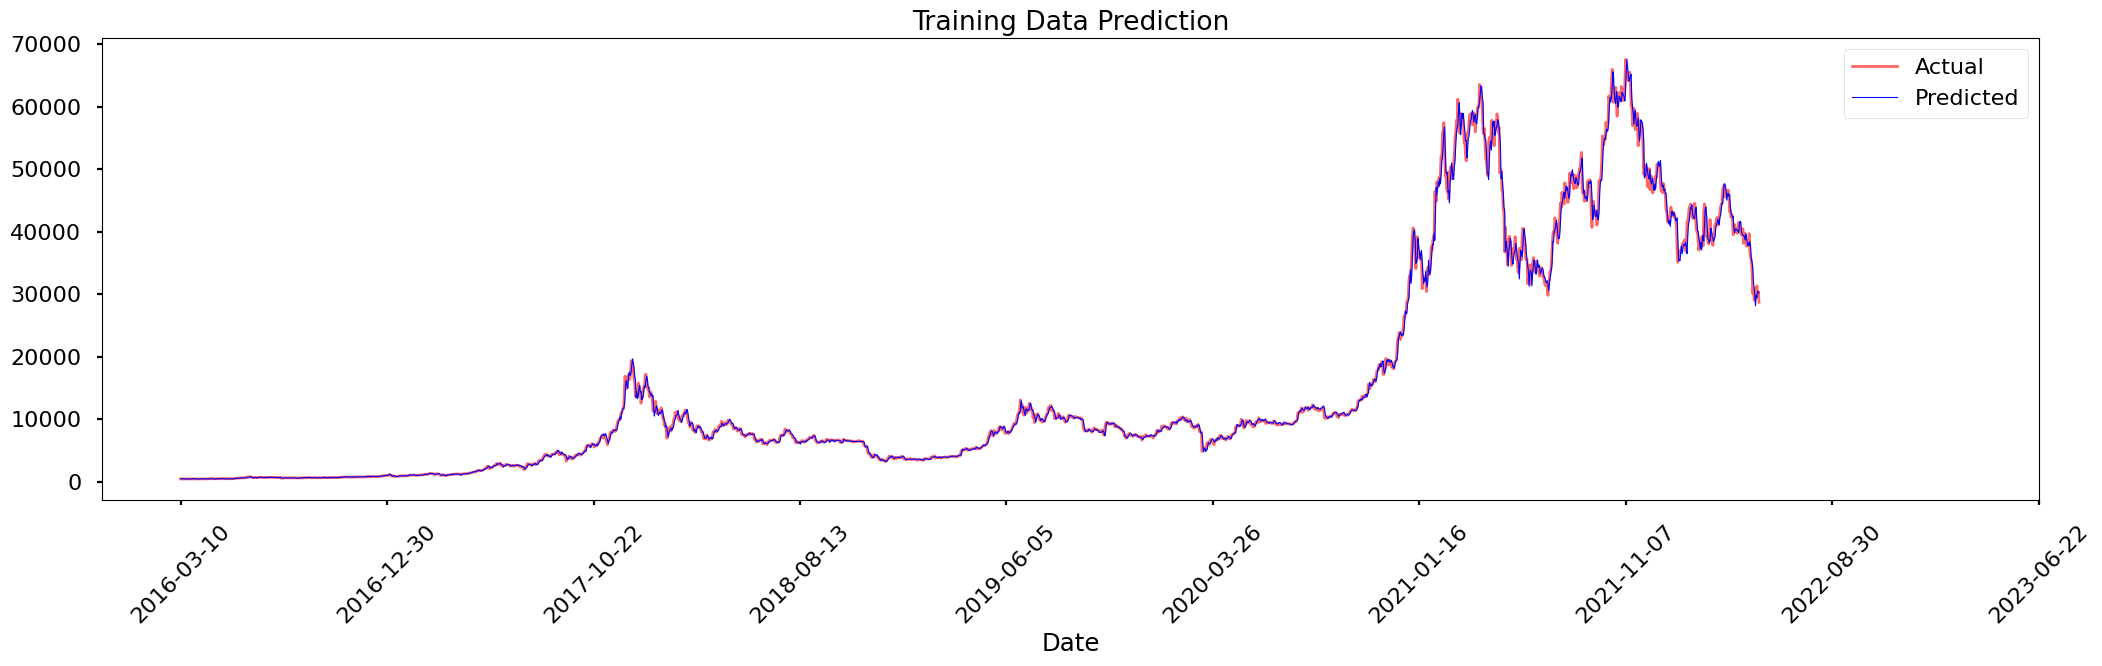

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of visible x-axis tick labels
num_ticks = 10  # Adjust the number of ticks as needed

plt.figure(figsize=(25, 6))
plt.plot(df.Date[1:len(y_new_train_df)], y_new_train_df[1:], color='red', linewidth=2.0, alpha=0.6)
plt.plot(df.Date[1:len(y_new_train_df)], y_new_train_pred, color='blue', linewidth=0.8)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Date')
plt.title("Training Data Prediction")

# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date)-1, num_ticks, dtype=np.int)
plt.xticks(x_ticks, df.Date[x_ticks], rotation=45)  # Adjust rotation angle as needed

plt.show()


In [28]:
y_test_df=scaler.inverse_transform(y_test_df.values.reshape(-1, 1))

In [29]:
y_test_pred=scaler.inverse_transform(model.predict(X_test_df.drop('Date', axis=1)[:-1]).reshape(-1,1))
y_test_pred[0:10]

array([[29759.84075099],
       [29911.14239311],
       [29374.09862952],
       [29963.88597936],
       [30089.51656843],
       [29491.46638646],
       [30174.74715587],
       [29366.01000279],
       [29216.30474922],
       [29191.043701  ]])

In [30]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

In [31]:
len(y_test_df)

400

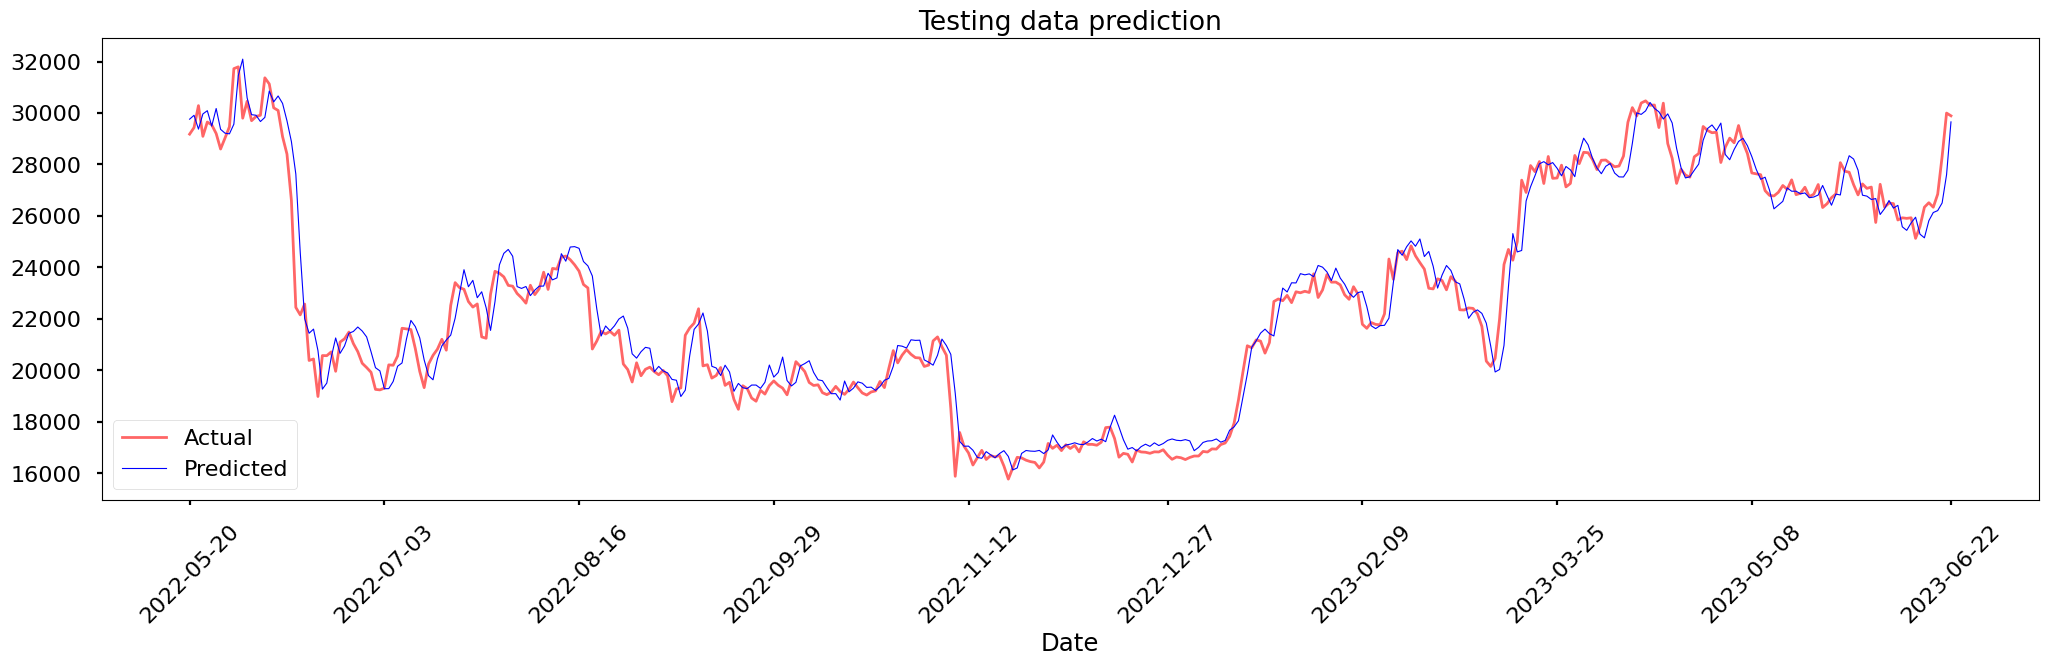

In [32]:
num_ticks = 10  # Adjust the number of ticks as needed
plt.figure(figsize=(25,6))
plt.plot(df.Date[len(y_new_train_df)+1:], y_test_df[1:len(y_test_df)], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df.Date[len(y_new_train_df)+1:], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Testing data prediction")
# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[len(y_new_train_df)+1:])-1, num_ticks, dtype=np.int)
plt.xticks(x_ticks, df.Date[len(y_new_train_df)+1+x_ticks], rotation=45)  # Adjust rotation angle as needed
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import r2_score
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_new_train_df[1:],y_new_train_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_new_train_df[1:],y_new_train_pred))
print("R2 score:", r2_score(y_new_train_df[1:],y_new_train_pred))
print("Test accuracy for test set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_test_df[1:],y_test_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test_df[1:],y_test_pred))
print("R2 score:", r2_score(y_test_df[1:],y_test_pred))



Test accuracy for train set
Root Mean Square Error (RMSE): 985.0936550183679
 Mean Absolute Percentage Error (MAPE): 0.03369244221653489
R2 score: 0.9967670778810631
Test accuracy for test set
Root Mean Square Error (RMSE): 831.7923662522514
 Mean Absolute Percentage Error (MAPE): 0.02653863746798166
R2 score: 0.9611349757302419
